In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Input data
data = {
    'Industry': ['Manufacturing', 'Finance and Insurance', 'Professional Business and Consumer services',
                 'Energy', 'Retail and Wholesale', 'Education', 'Healthcare', 'Government',
                 'Transportation', 'Media'],
    '2022': [24.8, 18.9, 14.6, 10.7, 8.7, 7.3, 5.8, 4.8, 3.9, 0.5],
    '2021': [23.2, 22.4, 12.7, 8.2, 7.3, 2.8, 5.1, 2.8, 4.0, 2.5],
    '2020': [17.7, 23.0, 8.7, 11.1, 10.2, 4.0, 6.6, 7.9, 5.1, 5.7],
    '2019': [8.0, 17.0, 10.0, 6.0, 16.0, 8.0, 3.0, 8.0, 13.0, 10.0],
    '2018': [10.0, 19.0, 12.0, 6.0, 11.0, 6.0, 6.0, 8.0, 13.0, 8.0],
}

# Convert data into a pandas DataFrame
df = pd.DataFrame(data)
df



,Industry,2022,2021,2020,2019,2018
0,Manufacturing,24.8,23.2,17.7,8.0,10.0
1,Finance and Insurance,18.9,22.4,23.0,17.0,19.0
2,Professional Business and Consumer services,14.6,12.7,8.7,10.0,12.0
3,Energy,10.7,8.2,11.1,6.0,6.0
4,Retail and Wholesale,8.7,7.3,10.2,16.0,11.0
5,Education,7.3,2.8,4.0,8.0,6.0
6,Healthcare,5.8,5.1,6.6,3.0,6.0
7,Government,4.8,2.8,7.9,8.0,8.0
8,Transportation,3.9,4.0,5.1,13.0,13.0
9,Media,0.5,2.5,5.7,10.0,8.0


In [11]:
# Transpose DataFrame to have years as rows and industries as columns
df = df.set_index('Industry').T

# Convert the index to datetime format
df.index = pd.to_datetime(df.index)



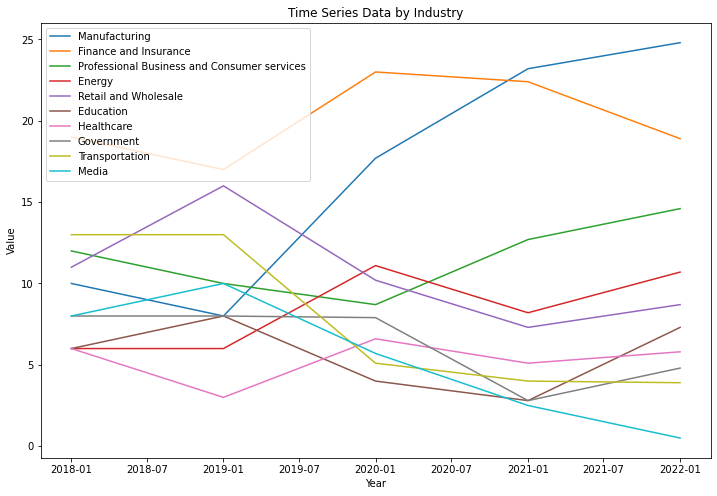

In [12]:
# Plot the time series data
plt.figure(figsize=(12, 8))
for industry in df.columns:
    plt.plot(df.index, df[industry], label=industry)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Time Series Data by Industry')
plt.grid(False)
plt.legend()
plt.show()



In [14]:
# Fit the time series model (SARIMAX)
model = sm.tsa.SARIMAX(df['Manufacturing'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast for 2023
future_dates = pd.date_range(start='2023-12-31', periods=1, freq='Y')
future = pd.DataFrame({'ds': future_dates})
forecast = results.get_forecast(steps=1, exog=future)  # Use exogenous variable for the forecast
forecasted_value = forecast.predicted_mean.iloc[0]

print(f"Forecasted value for Manufacturing in 2023: {forecasted_value:.2f}")

Forecasted value for Manufacturing in 2023: 10.00


c:\Users\vivian\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\vivian\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vivian\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\vivian\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vivian\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few obse